In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.utils import shuffle

# First order optimization

In [6]:

X, y = make_regression(n_samples=1000, n_features=4, noise=10, random_state=42)
y=y.reshape(-1,1)

In [7]:
X, y = shuffle(X, y, random_state=42)

In [8]:
X

array([[-1.44964522, -0.65002393, -0.08343797, -1.49652926],
       [-0.009119  , -0.89846798,  0.02818116,  0.53650984],
       [ 0.23421473, -0.76779757, -0.03468489, -1.00414077],
       ...,
       [-1.61156736,  0.22423474, -0.34642651,  1.85550331],
       [-1.35168461, -1.4066611 , -0.92323325, -0.6115178 ],
       [ 1.06977145,  0.58273758,  0.49687359, -0.62203481]])

In [10]:
y.shape

(1000, 1)

In [126]:
class Optimization:

  # default constructor
  def __init__(self,train_x,train_y):

    # Hyper parameters instance variables
    self.learning_rate = 0.01
    self.epochs = 300
    self.batch_size = len(train_y)
    self.gradient_tolerance = 0.0001
    self.cost_tolerance = 0.0001
    self.gama = 0.01
    # My data
    self.x = train_x
    self.y = train_y


  def GD_with_momentum(self, alpha=None, gradient_tolerance=None, cost_tolerance=None, gama=None, epochs=None, batch_size=None):

    # Set default values for hyperparameters if not provided
    alpha = alpha if alpha is not None else self.learning_rate
    epochs = epochs if epochs is not None else self.epochs
    batch_size = batch_size if batch_size is not None else len(self.y)
    gradient_tolerance = gradient_tolerance if gradient_tolerance is not None else self.gradient_tolerance
    cost_tolerance = cost_tolerance if cost_tolerance is not None else self.cost_tolerance
    gama = gama if gama is not None else self.gama

    # parameters initialization
    ones_column = np.ones((self.x.shape[0], 1)) #FOR BIAS
    augmented_matrix = np.column_stack((ones_column, self.x))
    w_vector = np.zeros((1,augmented_matrix.shape[1]))
    cost_array = []
    cost_itr = []
    w_array = []
    y_predict_val = []
    errors = []
    gradient_vector = []
    cost_array = []
    w_vector_v = np.zeros((1,augmented_matrix.shape[1]))

    batches_x = np.array_split(augmented_matrix, len(augmented_matrix) // batch_size)
    batches_y = np.array_split(self.y, len(self.y) // batch_size)

    for i in range(epochs):
      for (batch_x,batch_y) in zip(batches_x,batches_y):
        y_predict = np.dot(batch_x,w_vector.T)
        y_predict_val.append(y_predict)
        error = y_predict - batch_y
        errors.append(error)
        j = 1/(2*len(batch_y)) * np.sum(error**2)
        cost_itr.append(j)
        w_array.append([w_vector.flatten()])
        gradient_vector = 1/len(batch_y) * np.dot(batch_x.T,error)
        norm_gradient = np.linalg.norm(gradient_vector)
        w_vector_v = (gama*w_vector_v).reshape(1,-1) + (alpha*gradient_vector).reshape(1,-1)
        w_vector = (w_vector - w_vector_v).reshape(1,-1)

      # cost after updating weights in this epoch
      y_predict = np.dot(augmented_matrix,w_vector.T)
      error = y_predict - self.y
      j = 1/(2*len(y)) * np.sum(error**2)
      cost_array.append(j)

      # print('****************** Epoch '+str(i)+' ********************')
      # print('h(x): '+ str(y_predict))
      # print('')
      # print('')
      # print('Error vector '+ str(error))
      # print('')
      # print('')
      # print('j= '+ str(j))
      # print('')
      # print('')
      # print('Gradient Vector: '+str(gradient_vector))
      # print('')
      # print('')
      # print('Gradient Vector Norm: '+str(norm_gradient))
      # print('')
      # print('')
      # print('vector weight'+str(w_vector))

      if norm_gradient<gradient_tolerance :
        print('converged!')
        break

      if i>0:
        cost_conv = abs(cost_array[-1]-cost_array[-2])

        if cost_conv < cost_tolerance :
          print('converged!')
          break

    return w_array, cost_itr, cost_array, y_predict_val, w_vector, y_predict


  def Adam(self, alpha=None, gradient_tolerance=None, cost_tolerance=None, epsilon=None, beta=None, beta2=None, epochs=None, batch_size=None):

    # Set default values for hyperparameters if not provided
    alpha = alpha if alpha is not None else self.learning_rate
    epochs = epochs if epochs is not None else self.epochs
    batch_size = batch_size if batch_size is not None else len(self.y)
    gradient_tolerance = gradient_tolerance if gradient_tolerance is not None else self.gradient_tolerance
    cost_tolerance = cost_tolerance if cost_tolerance is not None else self.cost_tolerance
    epsilon = epsilon if epsilon is not None else 1e-8
    beta = beta if beta is not None else 0.9
    beta2 = beta2 if beta2 is not None else 0.999

    ones_column = np.ones((self.x.shape[0], 1))  # FOR BIAS
    augmented_matrix = np.column_stack((ones_column, self.x))

    w_vector = np.zeros((1, augmented_matrix.shape[1]))

    w_array = []
    y_predict_val = []
    errors = []

    gradient_vector = []
    cost_array = []
    cost_itr = []

    w_vector_v = np.zeros((1, augmented_matrix.shape[1]))
    m_vector = np.zeros((1, augmented_matrix.shape[1]))

    batches_x = np.array_split(augmented_matrix, len(augmented_matrix) // batch_size)
    batches_y = np.array_split(self.y, len(self.y) // batch_size)

    for i in range(epochs):
        for (batch_x, batch_y) in zip(batches_x, batches_y):
            y_predict = np.dot(batch_x, w_vector.T)
            y_predict_val.append(y_predict)
            error = y_predict - batch_y
            errors.append(error)

            j = 1 / (2 * len(self.y)) * np.sum(error ** 2)
            cost_itr.append(j)

            w_array.append([w_vector.flatten()])
            gradient_vector = 1 / len(batch_y) * np.dot(batch_x.T, error)
            norm_gradient = np.linalg.norm(gradient_vector)

            m_vector = (beta * m_vector).reshape(1, -1) + ((1 - beta) * gradient_vector).reshape(1, -1)

            m_bias = (m_vector / (1 - beta ** (i + 1))).reshape(1, -1)
            w_vector_v = (beta2 * w_vector_v).reshape(1, -1) + ((1 - beta2) * gradient_vector ** 2).reshape(1, -1)

            w_bias = w_vector_v / (1 - beta2 ** (i + 1))

            w_vector = w_vector - ((alpha / (np.sqrt(w_bias) + epsilon)) * m_bias).reshape(1, -1)

        # cost after updating weights in this epoch
        y_predict = np.dot(augmented_matrix, w_vector.T)
        error = y_predict - self.y
        j = 1 / (2 * len(self.y)) * np.sum(error ** 2)
        cost_array.append(j)

        # print('****************** Iteration ' + str(i) + ' ********************')
        # print('h(x): ' + str(y_predict))
        # print('')
        # print('')
        # print('Error vector ' + str(error))
        # print('')
        # print('')
        # print('j= ' + str(j))
        # print('')
        # print('')
        # print('Gradient Vector: ' + str(gradient_vector))
        # print('')
        # print('')
        # print('m_vector: ' + str(m_vector))
        # print('')
        # print('')
        # print('m_bias: ' + str(m_bias))
        # print('')
        # print('')
        # print('Gradient Vector Norm: ' + str(norm_gradient))
        # print('')
        # print('')
        # print('w_bias: ' + str(w_bias))
        # print('')
        # print('')
        # print('w_vector_v: ' + str(w_vector_v))
        # print('')
        # print('')
        # print('w: ' + str(w_vector))

        if norm_gradient < gradient_tolerance:
            print('converged!')
            break

        if i > 0:
            cost_conv = abs(cost_array[-1] - cost_array[-2])

            if cost_conv < cost_tolerance:
                print('converged')
                break

    return w_array, cost_itr, cost_array,y_predict_val, w_vector, y_predict

  def GD_NAG(self, alpha=None, gradient_tolerance=None, cost_tolerance=None, gama=None, epochs=None, batch_size=None):

      # Set default values for hyperparameters if not provided
      alpha = alpha if alpha is not None else self.learning_rate
      epochs = epochs if epochs is not None else self.epochs
      batch_size = batch_size if batch_size is not None else len(self.y)
      gradient_tolerance = gradient_tolerance if gradient_tolerance is not None else self.gradient_tolerance
      cost_tolerance = cost_tolerance if cost_tolerance is not None else self.cost_tolerance
      gama = gama if gama is not None else self.gama

      # parameters initialization
      ones_column = np.ones((self.x.shape[0], 1))  # FOR BIAS
      augmented_matrix = np.column_stack((ones_column, self.x))
      w_vector = np.zeros((1, augmented_matrix.shape[1]))
      cost_array = []
      w_array = []
      y_predict_val = []
      errors = []
      gradient_vector = []
      cost_itr = []
      w_vector_v = np.zeros((1, augmented_matrix.shape[1]))

      batches_x = np.array_split(augmented_matrix, len(augmented_matrix) // batch_size)
      batches_y = np.array_split(self.y, len(self.y) // batch_size)

      for i in range(epochs):
          for (batch_x, batch_y) in zip(batches_x, batches_y):
              w_temp = w_vector - (gama * w_vector_v).reshape(1, -1)

              y_predict = np.dot(batch_x, w_temp.T)
              y_predict_val.append(y_predict)
              error = y_predict - batch_y
              errors.append(error)
              j = 1 / (2 * len(batch_y)) * np.sum(error ** 2)
              cost_itr.append(j)
              w_array.append([w_vector.flatten()])
              gradient_vector_temp = 1 / len(y) * np.dot(batch_x.T, error)
              norm_gradient_temp = np.linalg.norm(gradient_vector_temp)
              w_vector_v = (gama * w_vector_v).reshape(1, -1) + (alpha * gradient_vector_temp).reshape(1, -1)
              w_vector = (w_vector - w_vector_v).reshape(1, -1)

          # cost after updating weights in this epoch
          y_predict = np.dot(augmented_matrix, w_vector.T)
          error = y_predict - self.y
          j = 1 / (2 * len(self.y)) * np.sum(error ** 2)
          cost_array.append(j)

          # print('****************** Epochs ' + str(i) + ' ********************')
          # print('h(x): ' + str(y_predict))
          # print('')
          # print('')
          # print('Error vector ' + str(error))
          # print('')
          # print('')
          # print('j= ' + str(j))
          # print('')
          # print('')
          # print('Gradient Vector: ' + str(gradient_vector_temp))
          # print('')
          # print('')
          # print('Gradient Vector Norm: ' + str(norm_gradient_temp))
          # print('')
          # print('')
          # print('vector_weights' + str(w_vector))

          if norm_gradient_temp < gradient_tolerance:
              print("converged")
              break

          if i > 0:
              cost_conv = abs(cost_array[i - 1] - cost_array[i])

              if cost_conv < cost_tolerance:
                  print("converged")
                  break

      return w_array, cost_itr, cost_array, y_predict_val, w_vector, y_predict

In [149]:
def loss_vs_iterations(cost_history):
    plt.figure(figsize=(10, 8))
    plt.plot(cost_history, marker='*')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss VS. Iterations')
    plt.grid(True)
    plt.show()

def plot_weights_vs_cost(w_array, cost_array):
    w_array = np.array(w_array)
    cost_array = np.array(cost_array)
    num_features = w_array.shape[2]

    fig, axes = plt.subplots(1, num_features, figsize=(15, 5))
    fig.suptitle('Weight Vectors vs. Cost', fontsize=16)

    for feature_index in range(num_features):
        ax = axes[feature_index]
        ax.plot(w_array[:, 0, feature_index], cost_array, label=f'Feature {feature_index + 1}')
        ax.set_xlabel('Weight Value')
        ax.set_ylabel('Cost')
        ax.legend()

    plt.show()


In [127]:
optimizer = Optimization(X,y)

### First

In [147]:
w_array,cost_itr,cost_array,y_predict_val,w_vector,y_predict = optimizer.GD_NAG(0.05,0.001,0.001,0.9,500,200)

converged


In [148]:
r2_score(y,y_predict)

0.9931744850612253

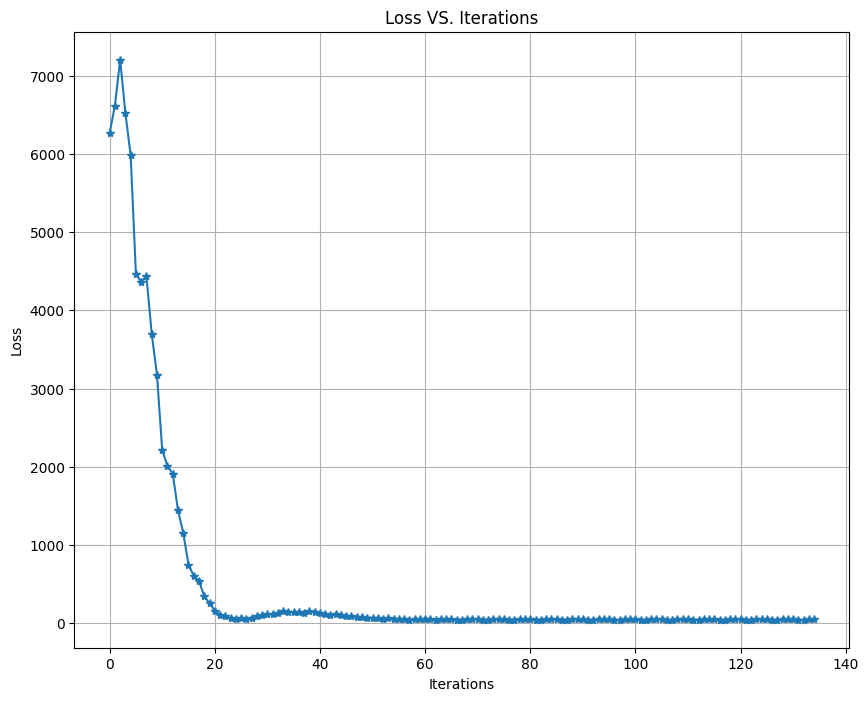

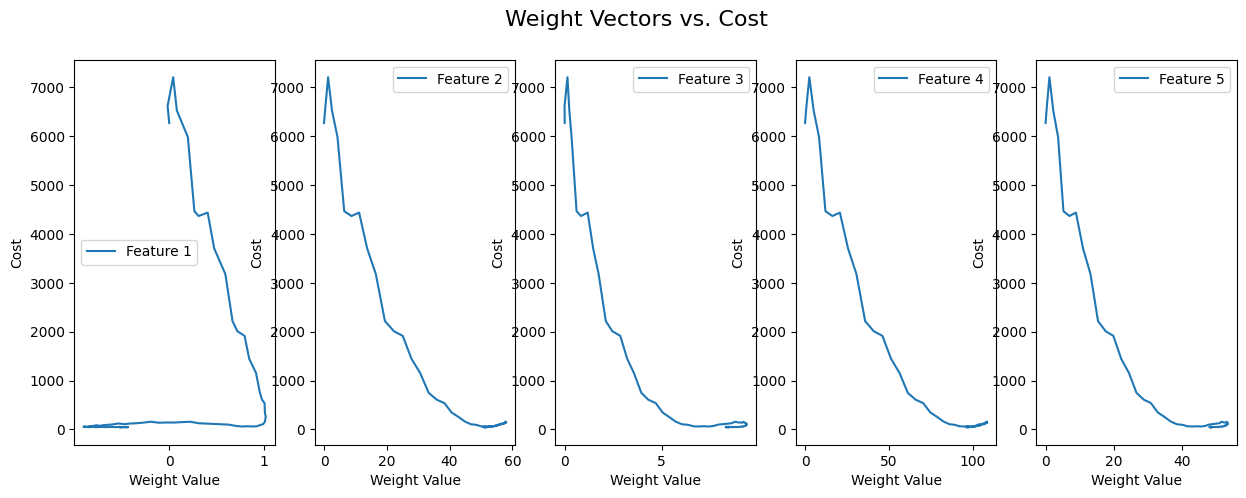

In [152]:
loss_vs_iterations(cost_itr)
w_array=np.array(w_array)
plot_weights_vs_cost(w_array,cost_itr)

In [153]:
print(np.array(cost_itr).shape)

(135,)


### second

In [143]:
w_array,cost_itr,cost_array,y_predict_val,w_vector,y_predict = optimizer.GD_with_momentum(alpha=0.05, gradient_tolerance=0.01, cost_tolerance=0.01, gama=0.9, epochs=500, batch_size=200)

converged!


In [144]:
r2_score(y,y_predict)

0.9931721263994658

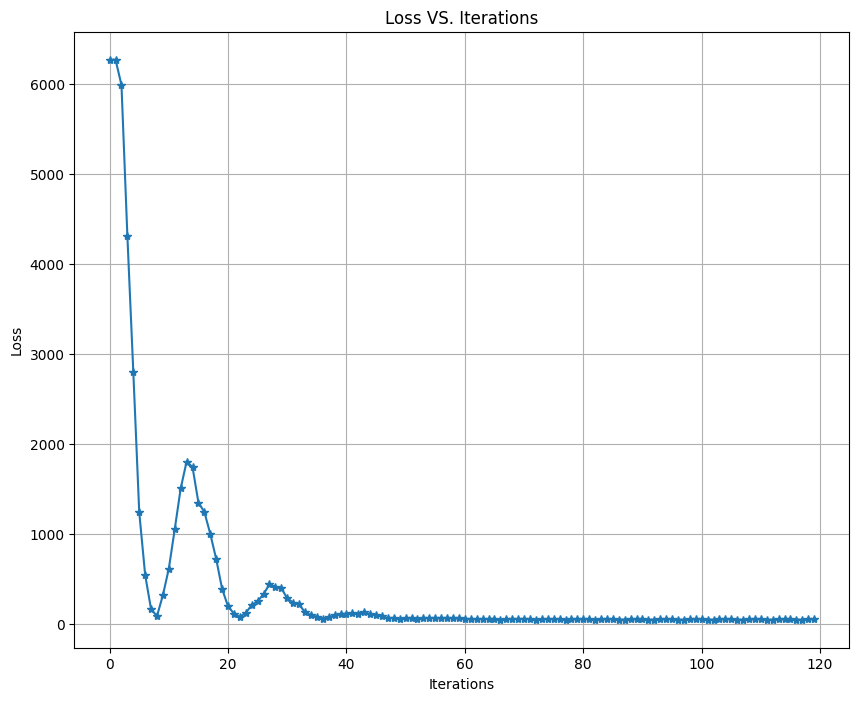

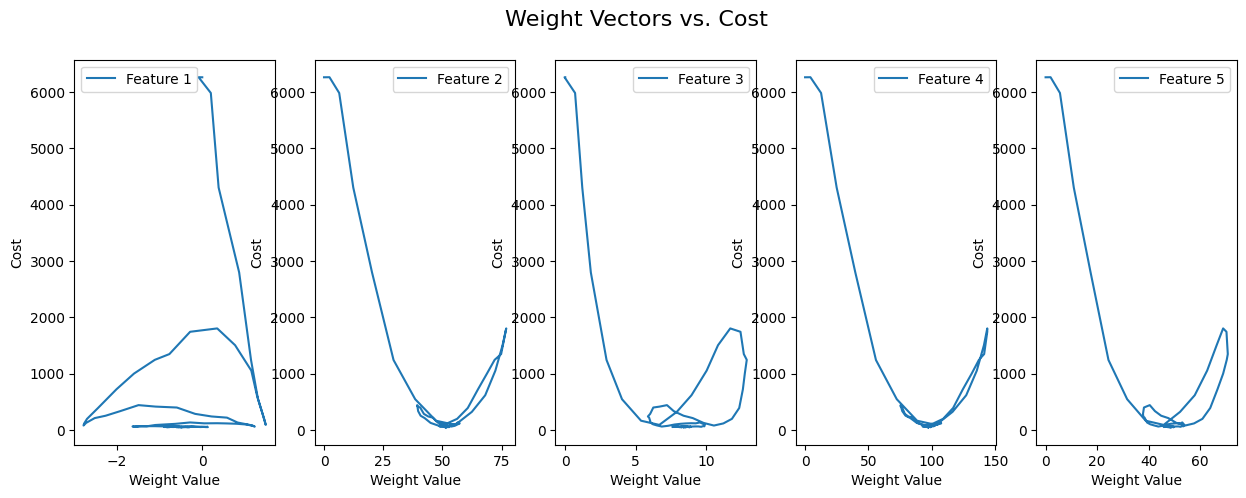

In [145]:
loss_vs_iterations(cost_itr)
w_array=np.array(w_array)
plot_weights_vs_cost(w_array,cost_itr)

In [146]:
print(np.array(cost_itr).shape)

(120,)


### Third

In [139]:
w_array,cost_itr,cost_array,y_predict_val,w_vector,y_predict = optimizer.GD_NAG(0.05,0.001,0.001,0.9,500,250)

converged


In [140]:
r2_score(y,y_predict)

0.9931743292902394

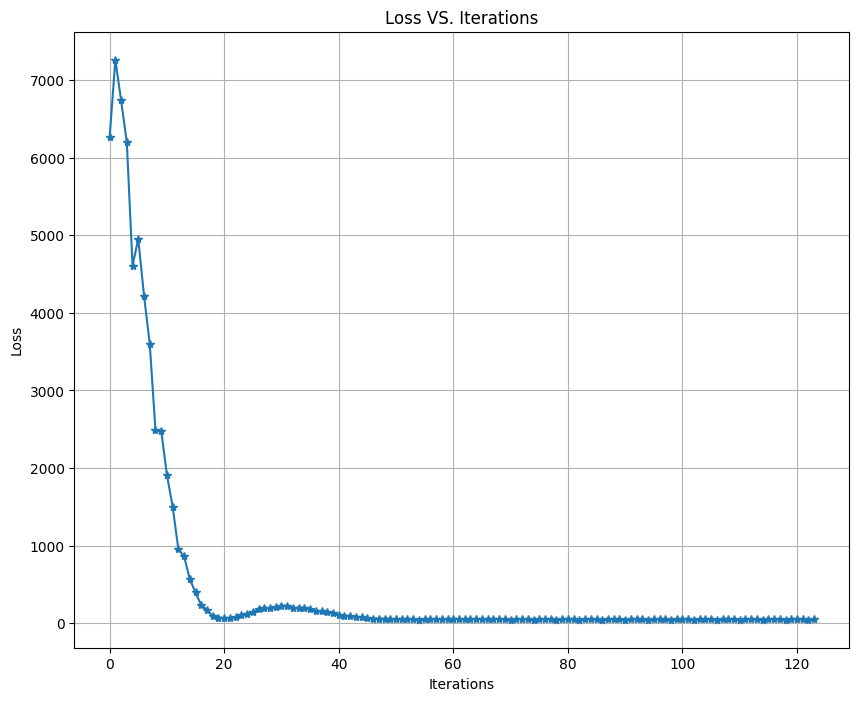

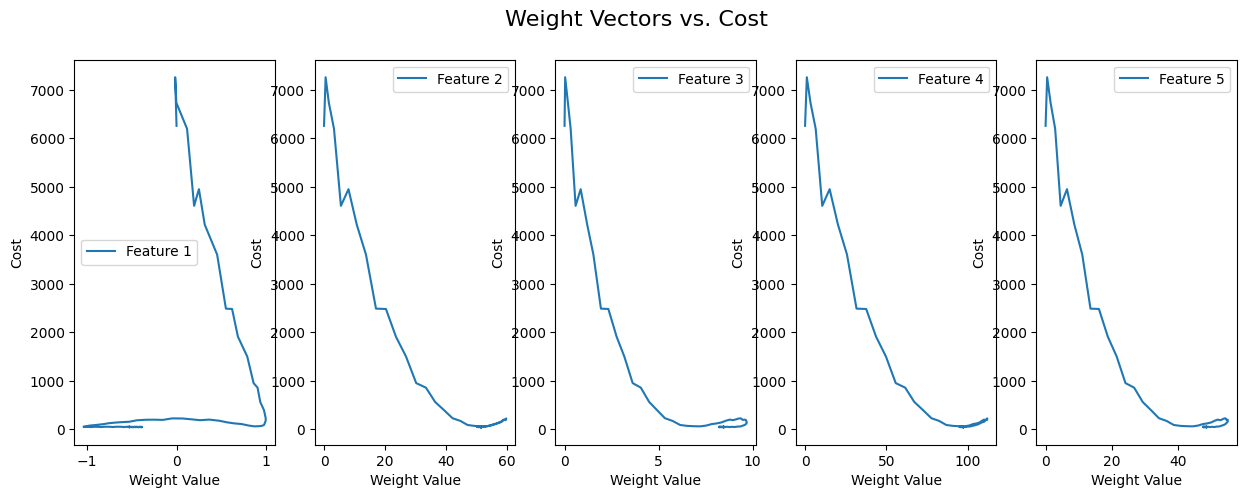

In [141]:
loss_vs_iterations(cost_itr)
w_array=np.array(w_array)
plot_weights_vs_cost(w_array,cost_itr)

In [142]:
print(np.array(cost_itr).shape)

(124,)


### forth

In [135]:
w_array,cost_itr,cost_array,y_predict_val,w_vector,y_predict = optimizer.GD_with_momentum(0.01,0.001,0.001,0.9,500,1000)

converged!


In [136]:
r2_score(y,y_predict)

0.9931644370626354

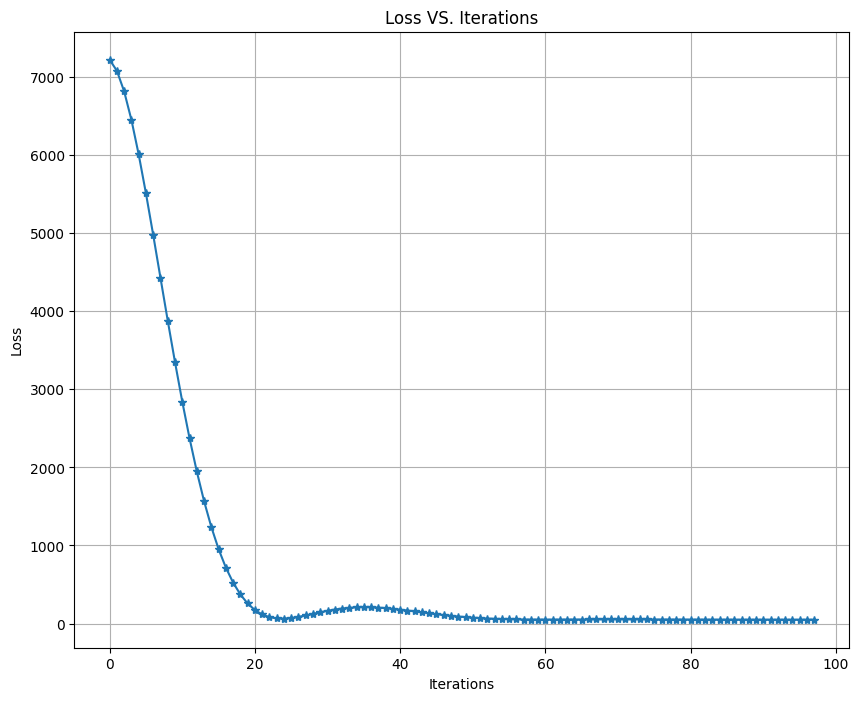

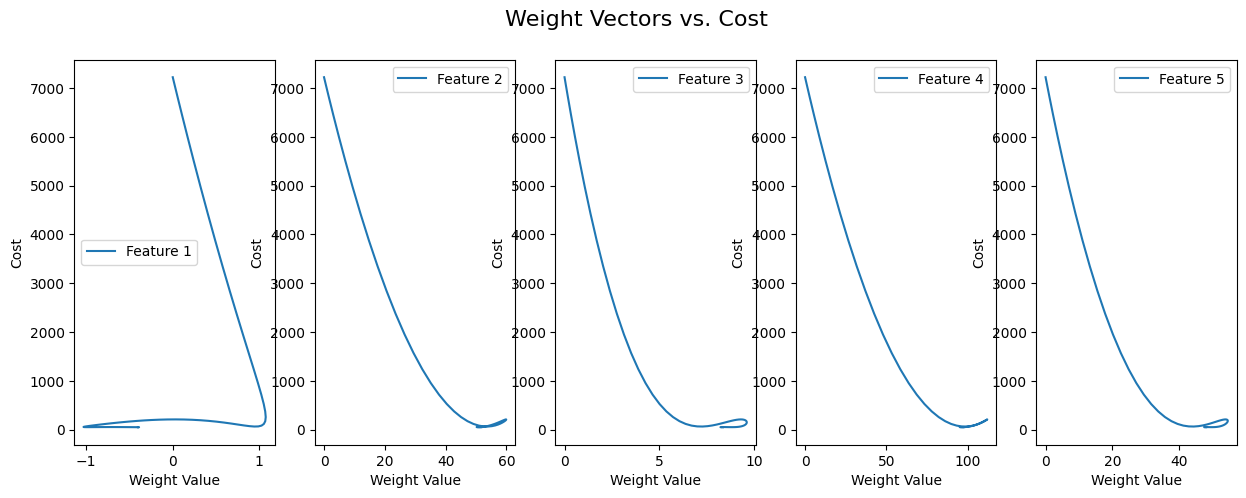

In [137]:
loss_vs_iterations(cost_itr)
w_array=np.array(w_array)
plot_weights_vs_cost(w_array,cost_itr)

In [138]:
print(np.array(cost_itr).shape)

(98,)


### fifth

converged


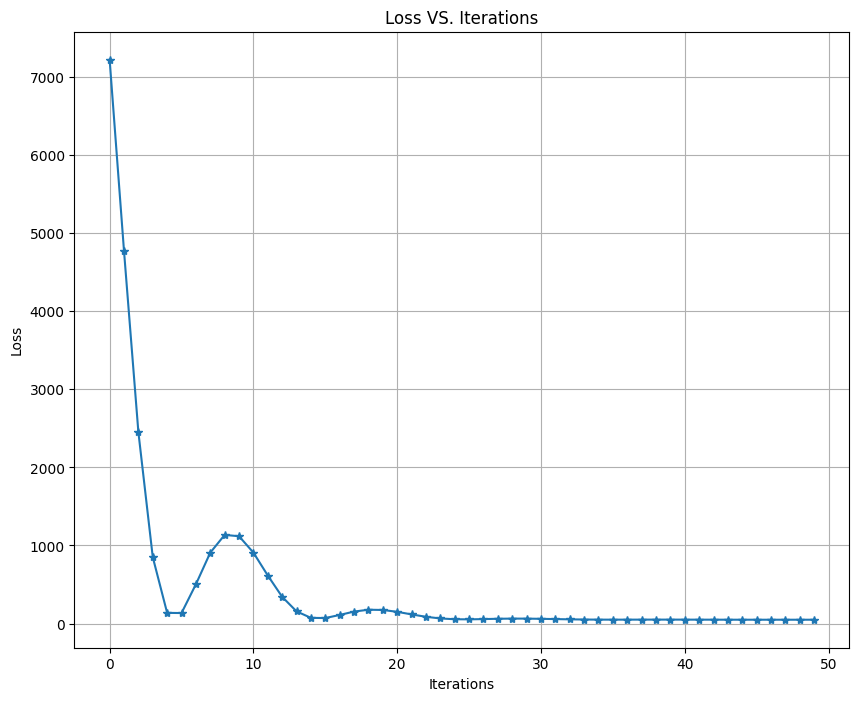

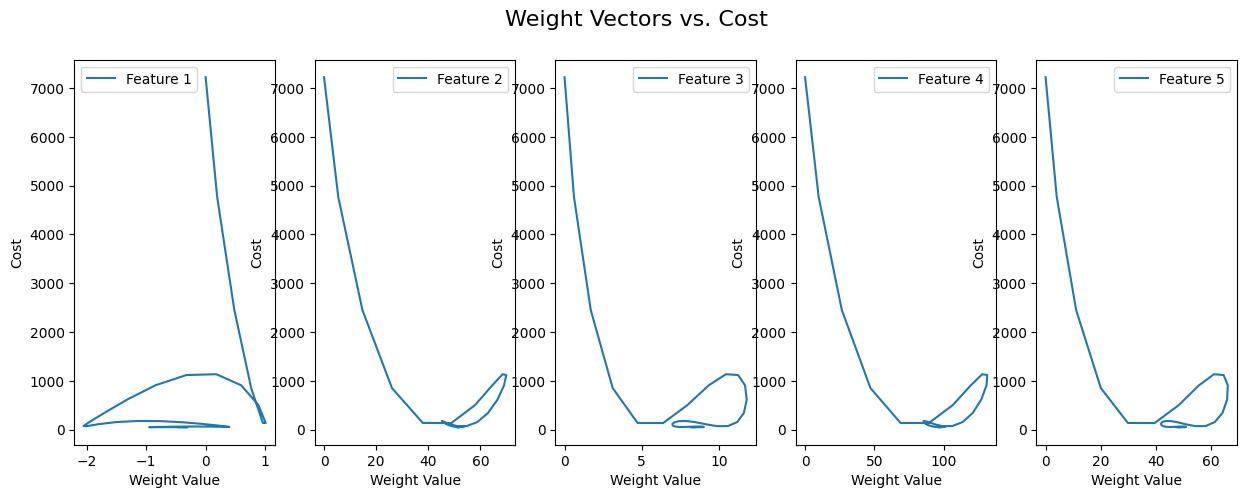

In [132]:
w_array,cost_itr,cost_array,y_predict_val,w_vector,y_predict = optimizer.GD_NAG(0.1,0.001,0.001,0.9,500,1000)

r2_score(y,y_predict)

loss_vs_iterations(cost_itr)
w_array=np.array(w_array)
plot_weights_vs_cost(w_array,cost_itr)

In [134]:
print(np.array(cost_itr).shape)

(50,)


# Second order optimization

In [154]:
f = lambda y, y_predict: 1/(2*len(y)) * np.sum((y - y_predict)**2)
df_dx = lambda y, y_predict, x: -1/len(y) * np.dot((y - y_predict).T, x)
d2f_df2 = lambda x: 1/len(x) * np.dot(x, x.T)

In [155]:
def BFGS(alpha,epsilon,max_itr,x,y):

  # parameters initialization
  ones_column = np.ones((x.shape[0], 1)) #FOR BIAS
  augmented_matrix = np.column_stack((ones_column, x))
  w = 0.1 * np.ones((augmented_matrix.shape[1],1))
  w_1 = np.zeros((augmented_matrix.shape[1],1))

  B_inv = np.eye(len(w))
  I = np.eye(len(w))

  for i in range(max_itr):

    delta_w = (w-w_1)
    delta_drivative = (df_dx(y,np.dot(augmented_matrix,w),augmented_matrix) - df_dx(y,np.dot(augmented_matrix,w_1),augmented_matrix)).reshape(-1,1)
    print(delta_drivative.shape)
    grad = df_dx(y,np.dot(augmented_matrix,w),augmented_matrix).reshape(-1,1)
    norm_grad = np.linalg.norm(grad)

    print('norm of gradient:' + str(norm_grad))

    if norm_grad<epsilon:
      print('*********************')
      print('after'+str(i+1)+'iterations')
      print('x_min'+str(w))
      print('grad'+str(grad))
      return w,grad,i


    first_term = I - (np.dot(delta_w,delta_drivative.T)/np.dot(delta_drivative.T,delta_w))
    second_term = I - (np.dot(delta_drivative,delta_w.T)/(np.dot(delta_drivative.T,delta_w)))
    third_term = np.dot(delta_w,delta_w.T)/np.dot(delta_drivative.T,delta_w)

    B_inv = (first_term@B_inv@second_term)  + third_term
    print('B_inv' + str(B_inv))
    print('**************************************************************')
    w_1=w
    w = w - alpha * (B_inv @ grad)

  return w,grad,max_itr

In [156]:
w,gradient,max_itr = BFGS(0.1,0.001,500,X,y)

(5, 1)
norm of gradient:119.1877364454179
B_inv[[ 0.97190954 -0.02504735 -0.01858912 -0.00613354  0.00509921]
 [-0.02504735  0.97799576 -0.01554601 -0.00309043  0.00814232]
 [-0.01858912 -0.01554601  0.99091222  0.0033678   0.01460055]
 [-0.00613354 -0.00309043  0.0033678   1.01582338  0.02705613]
 [ 0.00509921  0.00814232  0.01460055  0.02705613  1.03828888]]
**************************************************************
(5, 1)
norm of gradient:107.01624290011827
B_inv[[ 0.9719137  -0.02620365 -0.01873702 -0.00831837  0.0040889 ]
 [-0.02620365  0.96895343 -0.00662228 -0.0201557   0.01799687]
 [-0.01873702 -0.00662228  0.99303573  0.02023115  0.02412746]
 [-0.00831837 -0.0201557   0.02023115  0.98361677  0.04569289]
 [ 0.0040889   0.01799687  0.02412746  0.04569289  1.06145956]]
**************************************************************
(5, 1)
norm of gradient:96.31427294999516
B_inv[[ 0.97192684 -0.02695458 -0.01885938 -0.00973564  0.00337577]
 [-0.02695458  0.9691558  -0.00733645

In [157]:
w

array([[-0.50618317],
       [51.53261784],
       [ 8.43229576],
       [97.23018792],
       [48.43875582]])

In [158]:
gradient

array([[-1.46703681e-05],
       [-4.51983245e-04],
       [-5.21321045e-05],
       [-8.12692997e-04],
       [-3.38548936e-04]])

In [159]:
max_itr

111